## ch2.2 使用 kNN 改进约会网站的配对效果

如何在阅人无数后获得有价值的经验

In [70]:
from collections import Counter

### 读取数据

In [35]:
!head -10 ../^src/CH02/datingTestSet.txt

40920	8.326976	0.953952	largeDoses
14488	7.153469	1.673904	smallDoses
26052	1.441871	0.805124	didntLike
75136	13.147394	0.428964	didntLike
38344	1.669788	0.134296	didntLike
72993	10.141740	1.032955	didntLike
35948	6.830792	1.213192	largeDoses
42666	13.276369	0.543880	largeDoses
67497	8.631577	0.749278	didntLike
35483	12.273169	1.508053	largeDoses


In [3]:
!head -10 ../^src/CH02/datingTestSet2.txt

40920	8.326976	0.953952	3
14488	7.153469	1.673904	2
26052	1.441871	0.805124	1
75136	13.147394	0.428964	1
38344	1.669788	0.134296	1
72993	10.141740	1.032955	1
35948	6.830792	1.213192	3
42666	13.276369	0.543880	3
67497	8.631577	0.749278	1
35483	12.273169	1.508053	3


In [32]:
import numpy as np

def file2matrix(filename):
    with open(filename) as f:
        num_lines = len(f.readlines())
    matrix = np.zeros((num_lines, 3))
    labels_list = []
    index = 0
    with open(filename) as f:
        for line in f.readlines():
            list_from_line = line.strip().split('\t')
            matrix[index, :] = list_from_line[0:3]
            labels_list.append(int(list_from_line[-1]))
            index += 1
    labels = np.array(labels_list)
    return matrix, labels

In [39]:
dating_data, labels = file2matrix('../^src/Ch02/datingTestSet2.txt')

In [40]:
dating_data.shape, labels.shape

((1000, 3), (1000,))

### 分析数据

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

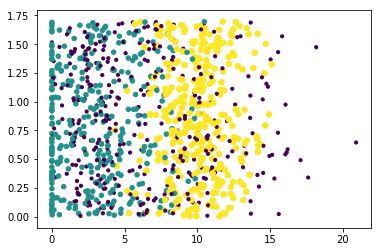

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dating_data[:,1], dating_data[:,2], 10.0*labels, 10.0*labels);

### 归一化 (normalize)

- `new_x = (old_x - min) / (max - min)`
- 值得学习的是 `np.tiles()` 的使用
- numpy 里的加减乘除均为 element-wise 运算. 矩阵运算需另行指定.

In [61]:
def auto_norm(data):
    min_vals = data.min(0)
    max_vals = data.max(0)
    ranges = max_vals - min_vals
    norm_data = np.zeros(np.shape(data))
    m = data.shape[0]
    norm_data = data - np.tile(min_vals, (m, 1))
    norm_data = norm_data / np.tile(ranges, (m, 1))
    return norm_data, ranges, min_vals

In [62]:
norm_mat, _, _ = auto_norm(dating_data)

In [63]:
norm_mat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

### 测试

In [68]:
def classify0(input_, dataset, labels, k):
    size0 = dataset.shape[0]
    diff_mat = np.tile(input_, (size0, 1)) - dataset;
    distances = ((diff_mat ** 2).sum(axis=1)) ** 0.5;
    sorted_dist_indices = distances.argsort()
    vote_labels = [labels[sorted_dist_indices[i]] for i in range(k)]
    cnt = Counter(vote_labels)
    sorted_cnt = sorted(cnt.items(), key=lambda t: t[1], reverse=True)
    return sorted_cnt[0][0]

In [66]:
test_file = '../^src/Ch02/datingTestSet2.txt'

def test():
    ho_ratio = 0.10
    dating_data, labels = file2matrix(test_file)
    norm_mat, _, _ = auto_norm(dating_data)
    m = norm_mat.shape[0]
    num_test = int(m * ho_ratio)
    error_count = 0
    
    # 前 num_test 个样本为测试集, 其余为训练集
    for i in range(num_test):
        result = classify0(norm_mat[i, :], norm_mat[num_test:m, :],
                           labels[num_test:m], 3)
        print('predict: {}, true: {}'.format(result, labels[i]))
        if (result != labels[i]):
            error_count += 1
    print('error rate: {}'.format(error_count/num_test))

In [71]:
test()

predict: 3, true: 3
predict: 2, true: 2
predict: 1, true: 1
predict: 1, true: 1
predict: 1, true: 1
predict: 1, true: 1
predict: 3, true: 3
predict: 3, true: 3
predict: 1, true: 1
predict: 3, true: 3
predict: 1, true: 1
predict: 1, true: 1
predict: 2, true: 2
predict: 1, true: 1
predict: 1, true: 1
predict: 1, true: 1
predict: 1, true: 1
predict: 1, true: 1
predict: 2, true: 2
predict: 3, true: 3
predict: 2, true: 2
predict: 1, true: 1
predict: 1, true: 2
predict: 3, true: 3
predict: 2, true: 2
predict: 3, true: 3
predict: 2, true: 2
predict: 3, true: 3
predict: 2, true: 2
predict: 1, true: 1
predict: 3, true: 3
predict: 1, true: 1
predict: 3, true: 3
predict: 1, true: 1
predict: 2, true: 2
predict: 1, true: 1
predict: 1, true: 1
predict: 2, true: 2
predict: 3, true: 3
predict: 3, true: 3
predict: 1, true: 1
predict: 2, true: 2
predict: 3, true: 3
predict: 3, true: 3
predict: 3, true: 3
predict: 1, true: 1
predict: 1, true: 1
predict: 1, true: 1
predict: 1, true: 1
predict: 2, true: 2
